In [1]:
import time
import tweepy
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
import matplotlib.pyplot as plt

In [2]:
%run ./keys.ipynb

In [3]:
callback_uri = 'oob'

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret, callback_uri)
auth.set_access_token(access_token,access_token_secret)

In [5]:
api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
api = tweepy.API(auth)

In [38]:
twitterAccount = "abcnews"

In [39]:
tweets = tweepy.Cursor(api.user_timeline,
                      screen_name=twitterAccount,
                      count=None,
                      since_id=None,
                      max_id=None,trim_user=True,exclude_replies=True,contributor_details=False,
                      include_entities=False).items(50);

In [40]:
df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweet'])

In [41]:
df.head()

,Tweet
0,COVID pain on national economy laid bare for a...
1,Infected airline hostess linked to seafood wor...
2,Chumpy Pullin's partner to give birth to his s...
3,Donald Trump has returned to the rally stage. ...
4,NSW government slammed for 'total incompetence...


In [44]:
def cleanUpTweet(txt):
    txt = re.sub(r'@[A-Za-z0-9]+', '', txt)
    txt = re.sub(r'#', '', txt)
    txt = re.sub(r'RT: ', '', txt)
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    return txt

In [45]:
df['Tweet']=df['Tweet'].apply(cleanUpTweet)

In [46]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

In [47]:
def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [48]:
df['Subjectivity']=df['Tweet'].apply(getTextSubjectivity)
df['Polarity']=df['Tweet'].apply(getTextPolarity)

In [49]:
df.head(50)

,Tweet,Subjectivity,Polarity
0,COVID pain on national economy laid bare for a...,0.250000,-0.125000
1,Infected airline hostess linked to seafood wor...,0.000000,0.000000
2,Chumpy Pullin's partner to give birth to his s...,0.750000,-0.750000
3,Donald Trump has returned to the rally stage. ...,0.000000,0.000000
4,NSW government slammed for 'total incompetence...,0.375000,0.000000
5,Live: State of Origin Game II Queensland vs NSW,0.450000,-0.131818
6,Miner becomes third case of community transmis...,0.000000,0.000000
7,"Live: Netherlands face Czechs, Red Devils meet...",0.250000,0.068182
8,Millions of Australians now living under new C...,0.454545,0.136364
9,Wallabies' SCG Test against France moved to Br...,0.000000,0.000000


In [58]:
df = df.drop(df[df['Tweet']==''].index)

In [59]:
df.head(50)

,Tweet,Subjectivity,Polarity
0,COVID pain on national economy laid bare for a...,0.250000,-0.125000
1,Infected airline hostess linked to seafood wor...,0.000000,0.000000
2,Chumpy Pullin's partner to give birth to his s...,0.750000,-0.750000
3,Donald Trump has returned to the rally stage. ...,0.000000,0.000000
4,NSW government slammed for 'total incompetence...,0.375000,0.000000
5,Live: State of Origin Game II Queensland vs NSW,0.450000,-0.131818
6,Miner becomes third case of community transmis...,0.000000,0.000000
7,"Live: Netherlands face Czechs, Red Devils meet...",0.250000,0.068182
8,Millions of Australians now living under new C...,0.454545,0.136364
9,Wallabies' SCG Test against France moved to Br...,0.000000,0.000000


In [61]:
def getTextAnalysis(a):
    if a<0:
        return "Negative"
    elif a==0:
        return "Neutral"
    elif a>0:
        return "Positive"

In [63]:
df["Score"]=df['Polarity'].apply(getTextAnalysis)

In [64]:
positive=df[df['Score']=="Positive"]
print(str(positive.shape[0]/(df.shape[0])*100)+"% of positive tweets")
pos=positive.shape[0]/df.shape[0]*100

42.0% of positive tweets


In [80]:
negative=df[df['Score']=="Negative"]
print(str(negative.shape[0]/(df.shape[0])*100)+"% of negative tweets")
neg=negative.shape[0]/df.shape[0]*100

18.0% of negative tweets


In [85]:
neutral=df[df['Score']=="Neutral"]
print(str(neutral.shape[0]/(df.shape[0])*100)+"% of neutral tweets")
neutral1=neutral.shape[0]/df.shape[0]*100

40.0% of neutral tweets


In [86]:
explode=[0,0.1,0]
labels='Positive','Negative','Neutral'
sizes=[pos,neg,neutral1]
colors=['yellowgreen','lightcoral','gold']

(-1.1250759538392163,
 1.1242913871180171,
 -1.1880560887535376,
 1.121575986903365)

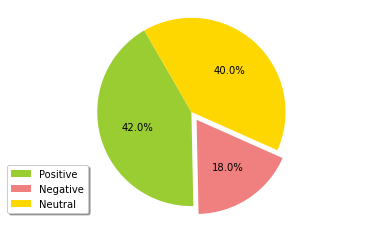

In [87]:
plt.pie(sizes,explode=explode,colors=colors,autopct='%1.1f%%',startangle=120)
plt.legend(labels,loc=(-0.05,0.05),shadow=True)
plt.axis('equal')

<BarContainer object of 3 artists>

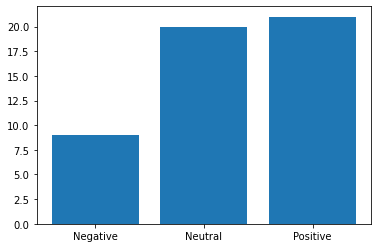

In [93]:
labels = df.groupby('Score').count().index.values
values = df.groupby('Score').size().values
plt.bar(labels,values)

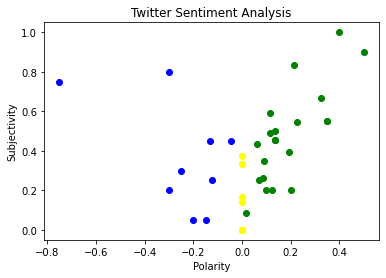

In [97]:
for index, row in df.iterrows():
    if row['Score']=='Positive':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='green')
    elif row['Score']=='Negative':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='blue')
    elif row['Score']=='Neutral':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='yellow')
plt.title('Twitter Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()